# 6.2 Exploring Relationships

## Table of Contents

#### 1. Importing Libraries
#### 2. Importing Data Sets
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

## 1. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## 2. Importing Data Sets

In [2]:
# importing data sets
path=r'/Users/isabelgonzalez/Desktop/Data Immersion/Achievement 6'
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'boat_sales_clean.csv'), index_col = False)

In [3]:
df.head(100)

,Eur Price,Boat Type,Manufacturer,Year Built,Length,Width,Material,Location,Views Last 7 Days,Boat Condition,Engine Type
0,3476.04,Motor Yacht,Rigiflex power boats,2017.0,4.00,1.90,NaN,Switzerland,226,new boat from stock,NaN
1,3490.00,Center console boat,Terhi power boats,2020.0,4.00,1.50,Thermoplastic,Germany,75,new boat from stock,NaN
2,3927.08,Sport Boat,Marine power boats,NaN,3.69,1.42,Aluminium,Switzerland,124,new boat from stock,NaN
3,3481.18,Sport Boat,Pioner power boats,2020.0,3.00,1.00,NaN,Denmark,64,new boat from stock,NaN
4,3399.00,Fishing Boat,Linder power boats,2019.0,3.55,1.46,Aluminium,Germany,58,new boat from stock,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,8500.00,Sport Boat,Hellwig power boats,2016.0,3.10,1.40,GRP,Germany,250,Used boat,Unleaded
96,8500.00,Center console boat,Janmor power boats,2005.0,5.30,2.33,NaN,France,173,Used boat,Unleaded
97,8500.00,"Deck Boat,Pilothouse,Sport Boat",NaN,1998.0,7.90,2.50,Aluminium,Germany,738,Used boat,Unleaded
98,10937.50,Sport Boat,NaN,2019.0,3.38,1.36,Wood,Switzerland,503,Used boat,Unleaded


### 3. Exploring Relationships

### Correlations

In [4]:
# create a correlation matrix using pandas
df.corr()

,Eur Price,Year Built,Length,Width,Views Last 7 Days
Eur Price,1.000000,0.094791,0.550072,0.507974,-0.009568
Year Built,0.094791,1.000000,-0.215599,-0.115254,-0.113922
Length,0.550072,-0.215599,1.000000,0.869513,-0.136144
Width,0.507974,-0.115254,0.869513,1.000000,-0.158810
Views Last 7 Days,-0.009568,-0.113922,-0.136144,-0.158810,1.000000


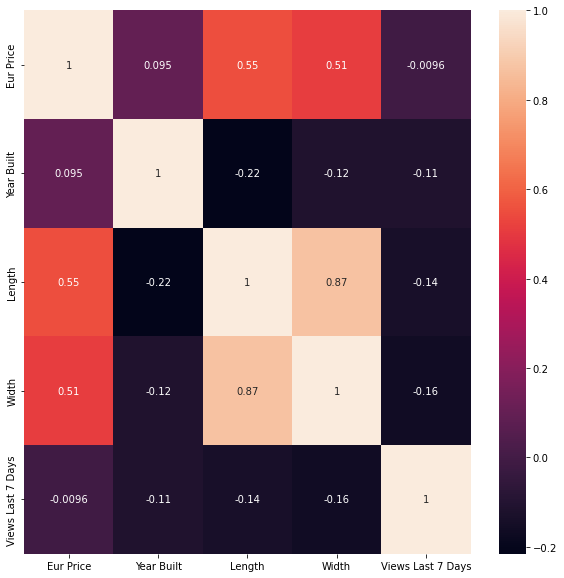

In [5]:
# create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

When looking at 'Views Last 7 Days' variable, the 'Eur Price', 'Year Built', 'Length' and 'Width' all have a negative number coefficients indicating a weak negative correlation. These factors do not really impact the amount of views the boat gets.

The 'Eur Price' variable has a 0.095 coefficient with 'Year Built' showing a very weak positive relationship. 

The 'Eur Price' variable has about an 0.5 coefficient with both 'Length' and 'Width' indicating a moderate to strong positive relationship. This could mean the longer and wider the boat, the higher the price.


### Scatterplots

/Users/isabelgonzalez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Eur Price', ylabel='Density'>

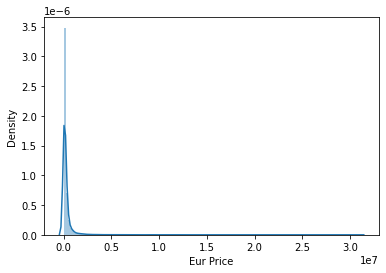

In [6]:
# shows extreme values
sns.distplot(df['Eur Price'], bins=150)

In [7]:
df2=df[df['Eur Price'] < 10000000]

/Users/isabelgonzalez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Views Last 7 Days', ylabel='Density'>

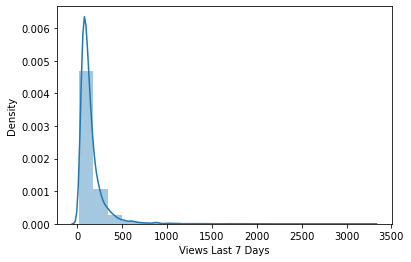

In [8]:
# shows extreme values
sns.distplot(df['Views Last 7 Days'], bins=20)

In [9]:
df2=df2[df2['Views Last 7 Days'] < 2500]

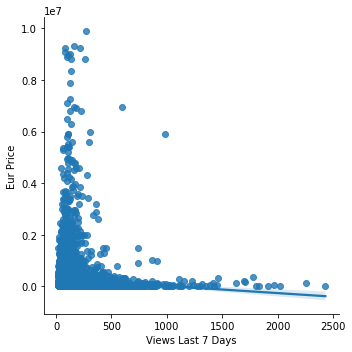

In [10]:
# Create a scatterplot for the "Eur Price" and "Views Last_7_Days" columns in seaborn

sns.lmplot(x = 'Views Last 7 Days', y = 'Eur Price', data = df2)

#### Discuss the output

I can see there are a large number of points that don’t fall close to the trend line.
Although the chart shows a weak negative correlation line, I can see that most of the boats with the highest views also have the lowest prices and the most expensive boats have low to average views.

### Pair Plots

In [11]:
# Keep only the variables you want to use in the pair plot

sub = df2[['Eur Price', 'Year Built', 'Length', 'Views Last 7 Days']]

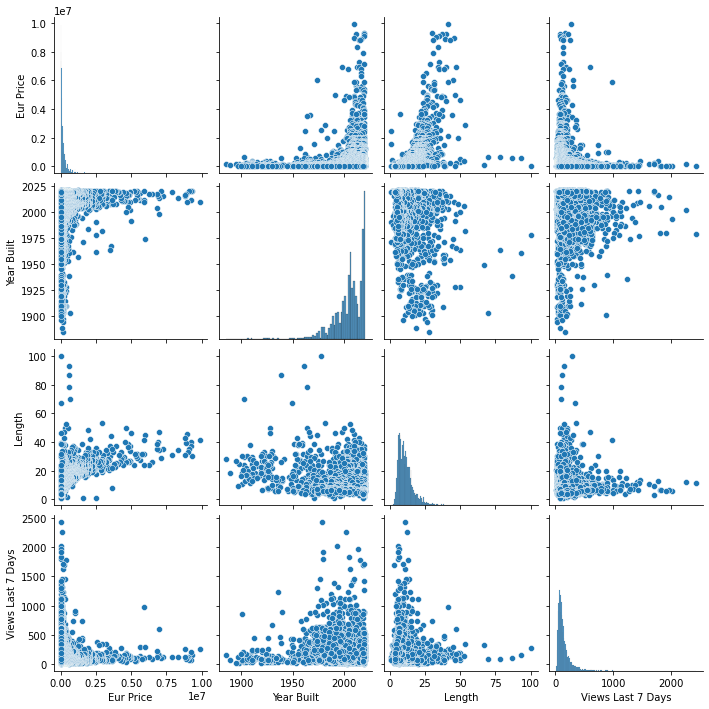

In [12]:
# Create a pair plot 

g = sns.pairplot(sub)

#### Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

I would like to explore more on what gets boats the most views and create a new category to seperate views into low, average, and high views so I can analyze the graph more clearly.

### Categorical Plots:

<AxesSubplot:xlabel='Views Last 7 Days', ylabel='Count'>

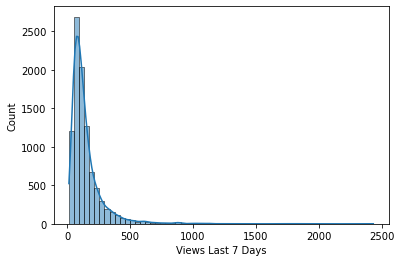

In [13]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df2['Views Last 7 Days'], bins = 60, kde = True)

In [14]:
df2.loc[df2['Views Last 7 Days'] < 70, 'Views Category'] = 'Low views'

In [15]:
df2.loc[(df2['Views Last 7 Days'] >= 70) & (df2['Views Last 7 Days'] < 250), 'Views Category'] = 'Average Views'

In [16]:
df2.loc[df2['Views Last 7 Days'] >= 250, 'Views Category'] = 'High views'

In [17]:
df2['Views Category'].value_counts(dropna = False)

Average Views    5990
Low views        2311
High views       1195
Name: Views Category, dtype: int64

In [18]:
df2.columns

Index(['Eur Price', 'Boat Type', 'Manufacturer', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Views Last 7 Days', 'Boat Condition',
       'Engine Type', 'Views Category'],
      dtype='object')

KeyboardInterrupt: 

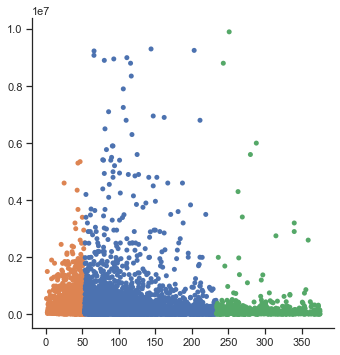

In [19]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Views Last 7 Days", y="Eur Price", hue="Views Category", data=df2)

#### Interpret the results

#### Do the more expensive boats get the more visits?
There is a weak correlation between expensive boats and visits but I can see from the graphs that most of the boats with the highest visits are on the cheaper side, minus a few outliers.
I would say the more expensive boats do not get more visits.

#### What contributes to a higher boat price?
The scatterplots show that the bigger the boat the more likely the price will be higher.

#### New questions that have arisen:

Are their certain types of boats that get visited the most?

What price range are the low priced boats vs the higher price boats?

What do people look for when viewing boats?

#### Define any hypotheses that you can at this point. You’ll be testing these later on.
People that post less expensive boats will get more views.

Lowering the cost of the boat will bring in more views.

In [20]:
g.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pair_plot.png'))

In [21]:
corr.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'sub_plot.png'))